### EDA on Crime Reports for City of Austin<a id='eda'>

## Contents<a id='Contents'></a>
* [EDA](#eda)
  * [Contents](#Contents)
    * [Imports](#imports)
    * [Load The Crime reports Data](#load_data)
        * [How is the dataset? Does it have Time Series components?](#hows_the_dataset)
    * [Choosing years 2013 to 2022 for EDA](#choose_years)
    * [Visualizing Number of Crime(NOC) Distributions](#viz_nocs)
      * [EDA on Council Districts](#council_districts)
          * [Aggregations on council_district using .agg()](#council_district_agg)
          * [Council District #9 on map](#council_9_map)
      * [EDA on APD sectors](#apd_sectors)
          * [APD sectors in Austin](#apd_sectors_map)
          * [Aggregations on APD Sectors](#apd_sector_agg)
      * [EDA on Census_tract](#census_tract)
      * [EDA on zip_code](#zip_codes)
      * [Crime Count Visualization(yearly,monthly,daily, hourly)](#daily_crime)
      * [EDA on Clearance Status](#clearance_status)
      * [Group Aggregation for top ten crimes](#top_10_gp_agg)
    * [Time series Dataset Prep using pivot_table method](#pivot_table)
        * [Missing Values](#missing_values)
        * [Filling the missing values](#fillna_method)
    * [Summary of EDA](#summary)
     

#### Library Imports<a id='imports'>

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import requests
import time
import missingno as msno
import pyarrow as pa
import pyarrow.parquet as pq
from pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

#### Load Data<a id='load_data'>

In [2]:
df_eda = pd.read_parquet('crime_reports_wrangled.parquet')

In [3]:
df_eda.head()

incident_report_number                     crime_type ucr_code  \
0             2023491535  ASSAULT BY CONTACT FAM/DATING      902   
1             2023491436   POSS CONTROLLED SUB/NARCOTIC     1800   
2             2023491425                          THEFT      600   
3             2023491475             TERRORISTIC THREAT     2704   
4             2023491472  DOC DISCHARGE GUN - PUB PLACE     2408   

  family_violence                         location_type               address  \
0               Y                      RESIDENCE / HOME      107 W CROSLIN ST   
1               N  HWY / ROAD / ALLEY/ STREET/ SIDEWALK         5100 DUVAL ST   
2               N                      RESIDENCE / HOME  4611 N IH 35 SVRD NB   
3               N             PARKING /DROP LOT/ GARAGE  7622 N IH 35 SVRD SB   
4               N                      RESIDENCE / HOME       6118 FAIRWAY ST   

  zip_code council_district sector district  ...     latitude     longitude  \
0    78752                4     ID        8  ...  30.33748689  -97.70997634   
1    78751                9     ID        6  ...   30.3142963  -97.71996482   
2    78722                9     BA        4  ...  30.30467246  -97.71280824   
3    78752                4     ID        8  ...  30.33890768  -97.70200101   
4    78741                3     HE        3  ...   30.2290038  -97.70310131   

                                            location clearance_status  \
0  {'human_address': '{"address": "", "city": "",...             None   
1  {'human_address': '{"address": "", "city": "",...                C   
2  {'human_address': '{"address": "", "city": "",...             None   
3  {'human_address': '{"address": "", "city": "",...             None   
4  {'human_address': '{"address": "", "city": "",...             None   

            clearance_date  occurred_date_time  reported_date_time     month  \
0                     None 2023-02-18 23:55:00 2023-02-18 23:55:00  February   
1  2023-02-19T00:00:00.000 2023-02-18 23:27:00 2023-02-18 23:27:00  February   
2                     None 2023-02-18 23:24:00 2023-02-18 23:24:00  February   
3                     None 2023-02-18 23:04:00 2023-02-18 23:04:00  February   
4                     None 2023-02-18 23:03:00 2023-02-18 23:48:00  February   

   year hour  
0  2023   23  
1  2023   23  
2  2023   23  
3  2023   23  
4  2023   23  

[5 rows x 24 columns]

### How is the dataset? Does it have Time Series components?<a id='hows_the_dataset'>

Columns that i observed for these four categories: <br>
(a) Time : 'clearance_date', 'occurred_date_time', 'reported_date_time', 'month',
       'year', 'hour'

(b) Location: 'location_type', 'address', 'zip_code', 'council_district', 'sector',
       'district', 'pra', 'census_tract', 'x_coordinate', 'y_coordinate',
       'latitude', 'longitude'

(c) Features: ??

(d) Target : crime_type,clearance_status, family_violence

In [4]:
df_eda.shape

(2000000, 24)

In [5]:
df_eda.columns

Index(['incident_report_number', 'crime_type', 'ucr_code', 'family_violence',
       'location_type', 'address', 'zip_code', 'council_district', 'sector',
       'district', 'pra', 'census_tract', 'x_coordinate', 'y_coordinate',
       'latitude', 'longitude', 'location', 'clearance_status',
       'clearance_date', 'occurred_date_time', 'reported_date_time', 'month',
       'year', 'hour'],
      dtype='object')

In [7]:
df_eda.dtypes

incident_report_number            object
crime_type                        object
ucr_code                          object
family_violence                   object
location_type                     object
address                           object
zip_code                          object
council_district                  object
sector                            object
district                          object
pra                               object
census_tract                      object
x_coordinate                      object
y_coordinate                      object
latitude                          object
longitude                         object
location                          object
clearance_status                  object
clearance_date                    object
occurred_date_time        datetime64[ns]
reported_date_time        datetime64[ns]
month                             object
year                              object
hour                               int64
dtype: object

In [8]:
df_eda.year.unique()

array(['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005'], dtype=object)

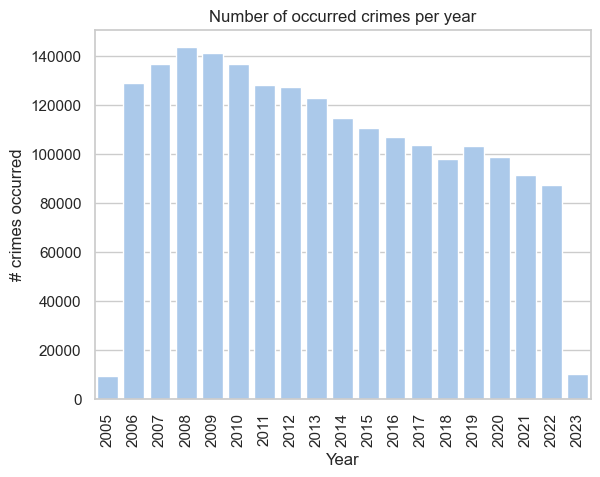

In [9]:
crimes_per_year = df_eda['year'].value_counts().sort_index()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

g = sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values,color='b')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(xlabel='Year', ylabel='# crimes occurred')
plt.title('Number of occurred crimes per year')
plt.show()

### Choosing years 2013 to 2022 for EDA<a id='choose_years'>

In [10]:
df_13_22 = df_eda.query("year > '2012' and year < '2023'")

In [11]:
df_13_22.head()

incident_report_number                      crime_type ucr_code  \
10362            20238000022                           THEFT      600   
10363              202310559  ASSAULT W/INJURY-FAM/DATE VIOL      900   
10364            20223651540                  EVADING / FOOT     2723   
10365            20223651539              FAMILY DISTURBANCE     3400   
10366            20223651533      AGG ASSAULT WITH MOTOR VEH      406   

      family_violence                         location_type  \
10362               N                      RESIDENCE / HOME   
10363               Y                      RESIDENCE / HOME   
10364               N  HWY / ROAD / ALLEY/ STREET/ SIDEWALK   
10365               N                      RESIDENCE / HOME   
10366               N  HWY / ROAD / ALLEY/ STREET/ SIDEWALK   

                     address zip_code council_district sector district  ...  \
10362       1804 ULLRICH AVE    78756                7     ID        7  ...   
10363     5121 CORNFLOWER DR    78739                8     DA        8  ...   
10364   NECHES ST / E 7TH ST    78701                9     GE        2  ...   
10365        12433 DESSAU RD    78754                1     ED        6  ...   
10366  8244 RESEARCH BLVD SB    78758                7     ID        7  ...   

          latitude     longitude  \
10362  30.33274275  -97.73728423   
10363  30.16858378  -97.88899989   
10364    30.267699  -97.73792112   
10365  30.38973342  -97.64647729   
10366  30.35570659  -97.71555725   

                                                location clearance_status  \
10362  {'human_address': '{"address": "", "city": "",...                N   
10363  {'human_address': '{"address": "", "city": "",...                N   
10364  {'human_address': '{"address": "", "city": "",...                C   
10365  {'human_address': '{"address": "", "city": "",...             None   
10366  {'human_address': '{"address": "", "city": "",...             None   

                clearance_date  occurred_date_time  reported_date_time  \
10362  2023-01-06T00:00:00.000 2022-12-31 23:55:00 2023-01-01 15:40:00   
10363  2023-01-11T00:00:00.000 2022-12-31 23:50:00 2023-01-01 09:35:00   
10364  2023-01-01T00:00:00.000 2022-12-31 23:49:00 2022-12-31 23:49:00   
10365                     None 2022-12-31 23:48:00 2022-12-31 23:48:00   
10366                     None 2022-12-31 23:45:00 2022-12-31 23:52:00   

          month  year hour  
10362  December  2022   23  
10363  December  2022   23  
10364  December  2022   23  
10365  December  2022   23  
10366  December  2022   23  

[5 rows x 24 columns]

In [12]:
df_13_22.shape

(1037869, 24)

In [13]:
df_13_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037869 entries, 10362 to 1048230
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   incident_report_number  1037869 non-null  object        
 1   crime_type              1037869 non-null  object        
 2   ucr_code                1037869 non-null  object        
 3   family_violence         1037869 non-null  object        
 4   location_type           1034070 non-null  object        
 5   address                 1037868 non-null  object        
 6   zip_code                1032508 non-null  object        
 7   council_district        1028624 non-null  object        
 8   sector                  1035066 non-null  object        
 9   district                1034750 non-null  object        
 10  pra                     1033597 non-null  object        
 11  census_tract            1029545 non-null  object        
 12  x_coordina

<AxesSubplot:>

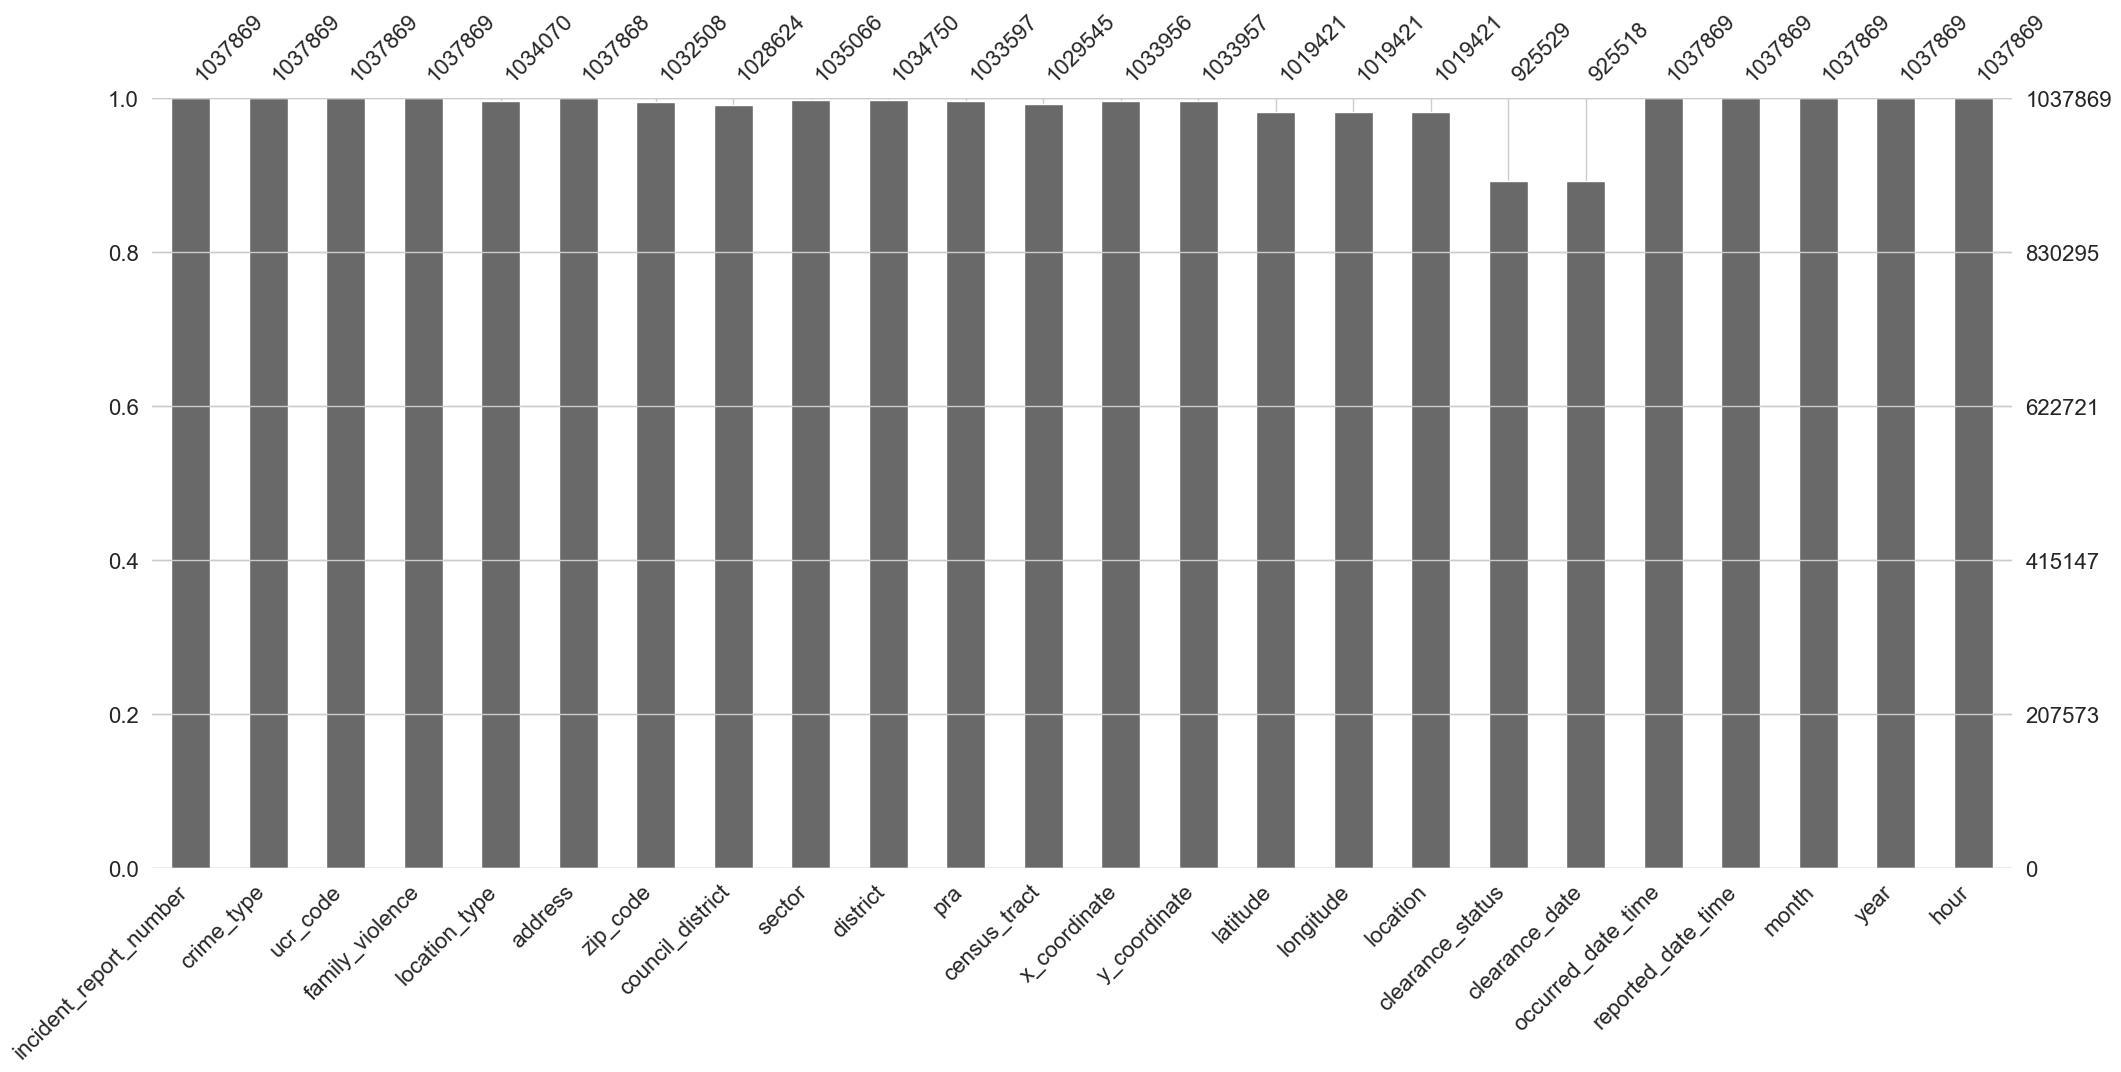

In [14]:
msno.bar(df_13_22)

I see some missing values for zip_codes which I want to explore the reason for those . 

In [16]:
df_13_22_nullzips = df_13_22.loc[df_13_22['zip_code'].isna()]

In [20]:
df_13_22_nullzips.loc[:,['incident_report_number', 'crime_type', 
        'location_type', 'address', 'zip_code', 'council_district',
       'sector', 'x_coordinate',
       'y_coordinate', 'latitude', 'longitude', 'location','occurred_date_time','clearance_status','clearance_date']]

incident_report_number                   crime_type  \
10474              20223650737           FAMILY DISTURBANCE   
10673              20235002373                        THEFT   
10798              20225034861             PROTECTIVE ORDER   
10884              20223631437  EXPLOSIVE ORDNANCE DISPOSAL   
11226              20223640653                   AUTO THEFT   
...                        ...                          ...   
1045627            20135001175             PROTECTIVE ORDER   
1045996            20135001244  EXPLOSIVE ORDNANCE DISPOSAL   
1046289            20135009782                         RAPE   
1047732            20135000095             PROTECTIVE ORDER   
1047839            20135016777               IDENTITY THEFT   

                                location_type                       address  \
10474                        RESIDENCE / HOME            7033 ENTERPRISE CT   
10673                       CONSTRUCTION SITE    12489 N US 183 HWY SVRD SB   
10798                        RESIDENCE / HOME                       UNKNOWN   
10884    HWY / ROAD / ALLEY/ STREET/ SIDEWALK                 19611 E TX 29   
11226    HWY / ROAD / ALLEY/ STREET/ SIDEWALK                    CAMERON RD   
...                                       ...                           ...   
1045627                      RESIDENCE / HOME                       UNKNOWN   
1045996  HWY / ROAD / ALLEY/ STREET/ SIDEWALK  N TURNERSVILLE RD / TEXAS 45   
1046289                      RESIDENCE / HOME              00 BLOCK UNKNOWN   
1047732                      RESIDENCE / HOME                       UNKNOWN   
1047839                       OTHER / UNKNOWN                       UNKNOWN   

        zip_code council_district sector x_coordinate y_coordinate  \
10474       None             None   None         None         None   
10673       None             None   ADA<         None         None   
10798       None             None     DA         None         None   
10884       None             None   None         None         None   
11226       None             None   None         None         None   
...          ...              ...    ...          ...          ...   
1045627     None             None     AD         None         None   
1045996     None             None     88      3103466     10006717   
1046289     None             None   None            0            0   
1047732     None             None     ED         None         None   
1047839     None             None   None         None         None   

            latitude     longitude  \
10474           None          None   
10673           None          None   
10798           None          None   
10884           None          None   
11226           None          None   
...              ...           ...   
1045627         None          None   
1045996  30.09272948  -97.78180947   
1046289         None          None   
1047732         None          None   
1047839         None          None   

                                                  location  \
10474                                                 None   
10673                                                 None   
10798                                                 None   
10884                                                 None   
11226                                                 None   
...                                                    ...   
1045627                                               None   
1045996  {'human_address': '{"address": "", "city": "",...   
1046289                                               None   
1047732                                               None   
1047839                                               None   

         occurred_date_time clearance_status           clearance_date  
10474   2022-12-31 14:47:00             None                     None  
10673   2022-12-30 17:30:00             None                     None  
10798   2022-12-30 07:47:00                

##### This shows that for 5361 records, locations have not been noted. 

### EDA on Council Districts<a id='council_districts'>
    
    Which Council district has highest number of crime incidents in Austin?

In [21]:
df_13_22.council_district.unique()

array(['7', '8', '9', '1', '6', '2', '4', '5', '3', '10', None],
      dtype=object)

In [22]:
df_13_22.council_district.value_counts()

9     161004
3     156425
4     148096
1     123277
7     108431
2     104695
5      81655
6      56057
10     45772
8      43212
Name: council_district, dtype: int64

In [23]:
df_13_22.council_district.value_counts().info()

<class 'pandas.core.series.Series'>
Index: 10 entries, 9 to 8
Series name: council_district
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


### Aggregations on council_district using .agg()<a id='council_district_agg'>

In [257]:
df_13_22.groupby(["year","council_district"]).agg(
    count=('council_district', 'count')
    
 ).sort_values(by = ['year', 'count'], ascending = [True, False])

count
year council_district       
2013 3                 19678
     9                 19461
     4                 18264
     1                 15928
     2                 12298
...                      ...
2022 2                  8628
     5                  6826
     10                 4797
     6                  4779
     8                  3906

[100 rows x 1 columns]

In [25]:

df_13_22['day'] = df_13_22['occurred_date_time'].apply(lambda x: x.strftime('%A')) 

In [26]:
df_13_22.head(2)

incident_report_number                      crime_type ucr_code  \
10362            20238000022                           THEFT      600   
10363              202310559  ASSAULT W/INJURY-FAM/DATE VIOL      900   

      family_violence     location_type             address zip_code  \
10362               N  RESIDENCE / HOME    1804 ULLRICH AVE    78756   
10363               Y  RESIDENCE / HOME  5121 CORNFLOWER DR    78739   

      council_district sector district  ...     longitude  \
10362                7     ID        7  ...  -97.73728423   
10363                8     DA        8  ...  -97.88899989   

                                                location clearance_status  \
10362  {'human_address': '{"address": "", "city": "",...                N   
10363  {'human_address': '{"address": "", "city": "",...                N   

                clearance_date  occurred_date_time  reported_date_time  \
10362  2023-01-06T00:00:00.000 2022-12-31 23:55:00 2023-01-01 15:40:00   
10363  2023-01-11T00:00:00.000 2022-12-31 23:50:00 2023-01-01 09:35:00   

          month  year hour       day  
10362  December  2022   23  Saturday  
10363  December  2022   23  Saturday  

[2 rows x 25 columns]

### Visualizing Number of Crime(NOC) Distributions<a id='viz_nocs'>

In [27]:
# Specifying the values to plot (year, month, day, hour, district, sector)
noc_year = pd.DataFrame(data = df_13_22["year"].value_counts().reset_index().values,
                        columns = ["year", "noc"]).sort_values("year").reset_index(drop = True)
noc_month = pd.DataFrame(data = df_13_22["month"].value_counts().reset_index().values,
                        columns = ["month", "noc"]).sort_values("month").reset_index(drop = True)
noc_day = pd.DataFrame(data = df_13_22["day"].value_counts().reset_index().values,
                        columns = ["day", "noc"]).sort_values("day").reset_index(drop = True)
noc_hour = pd.DataFrame(data = df_13_22["hour"].value_counts().reset_index().values,
                        columns = ["hour", "noc"]).sort_values("hour").reset_index(drop = True)
noc_district = pd.DataFrame(data = df_13_22["council_district"].value_counts().reset_index().values,
                        columns = ["district", "noc"])
noc_sector = pd.DataFrame(data = df_13_22["sector"].value_counts().reset_index().values,
                        columns = ["sector", "noc"]).sort_values("noc", ascending = False).reset_index(drop = True).head(30)

# Create a subplot with 3 rows and 2 cols
fig = make_subplots(rows = 3, cols = 2,
                   specs = [[{"type" : "scatter"}, {"type" : "scatter"}], [{"type" : "scatter"},
                             {"type" : "scatter"}], [{"type" : "bar"}, {"type" : "bar"}]],
                   subplot_titles = ("NOC per Year", "NOC per Month", "NOC per Day", "NOC per Hour", "NOC per District", "NOC per Sector"))

# Plot the values
fig.add_trace(go.Scatter(x = noc_year["year"],
                        y = noc_year["noc"]), row = 1, col = 1)
fig.add_trace(go.Scatter(x = noc_month["month"],
                        y = noc_month["noc"]), row = 1, col = 2)
fig.add_trace(go.Scatter(x = noc_day["day"],
                        y = noc_day["noc"]), row = 2, col = 1)
fig.add_trace(go.Scatter(x = noc_hour["hour"],
                        y = noc_hour["noc"]), row = 2, col = 2)
fig.add_trace(go.Bar(x = noc_district["district"],
                        y = noc_district["noc"]), row = 3, col = 1)
fig.add_trace(go.Bar(x = noc_sector["sector"],
                        y = noc_month["noc"]), row = 3, col = 2)

# Update x axes parameters
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Month", range=[0, 13], row=1, col=2)
fig.update_xaxes(title_text="Day", row=2, col=1)
fig.update_xaxes(title_text="Hour",row=2, col=2)
fig.update_xaxes(title_text="District", row=3, col=1)
fig.update_xaxes(title_text="Sector", row=3, col=2)

# Update y axes parameters
fig.update_yaxes(title_text="Crime Count", row=1, col=1)
fig.update_yaxes(title_text="Crime Count",row=1, col=2)
fig.update_yaxes(title_text="Crime Count", row=2, col=1)
fig.update_yaxes(title_text="Crime Count", row=2, col=2)
fig.update_yaxes(title_text="Crime Count", row=3, col=1)
fig.update_yaxes(title_text="Crime Count", row=3, col=2)

fig.update_layout(showlegend=False,title_text="Distributions of Total NOC Between 2013-2022", height=900)


### Council District #9 on map<a id='council_9_map'>
    
    I got this image from source: https://www.austinmonitor.com/wp-content/uploads/2014/12/map.jpg

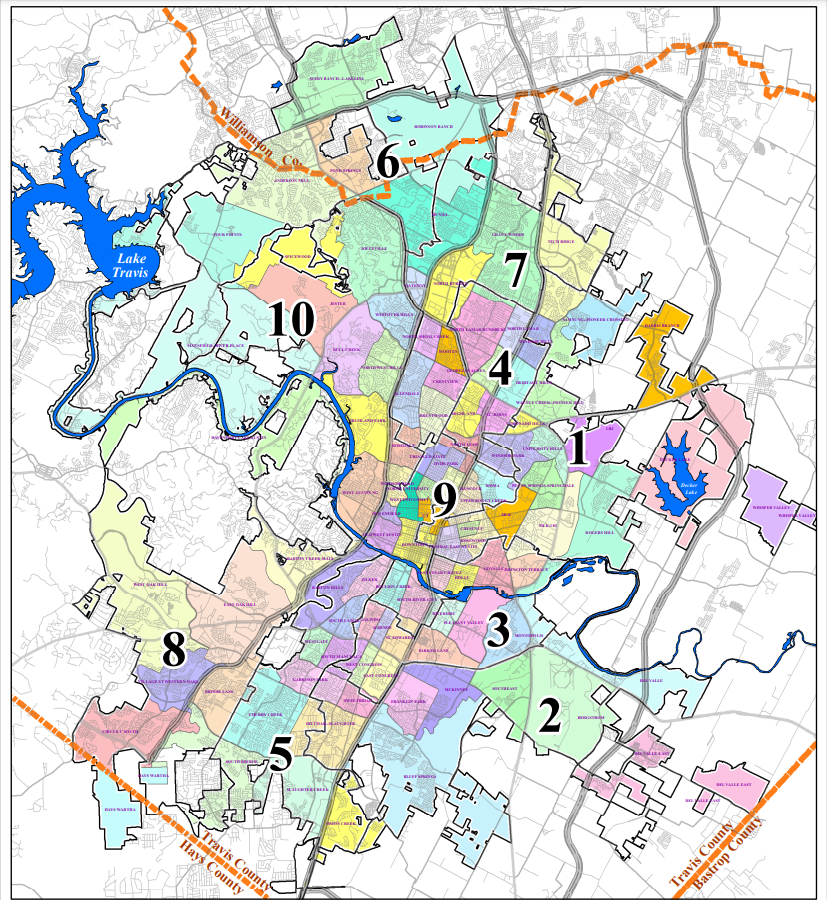

In [28]:
from IPython.display import Image
Image(filename='austin_council_districts.png') 


### Observations:

1. Crime rate is declining. From 2103 to 2018 it decline but some spike is noted in 2019 but declining since then.  <br/>
2. Big dip in the crime rate in the months of February and November<br/>
3. Crime rate is very low on Sunday and Prakes on Friday<br />
4. Hourly crime rate is high at noon and midnight. Very low around 5 am. <br />
5. For council_district 9, 3, 4 there seems to be high crime rates.
6. APD sector Baker, Henry, George shows high crime reported cases. 


### Visualizing council district 9 on the Austin map

In [31]:
# import folium package
import folium
from folium import plugins
# Map method of folium return Map object
 
# Here we pass coordinates of Gfg
# and starting Zoom level = 12
my_map1 = folium.Map(location = [30.27536, -97.73221],zoom_start = 12 )
# CircleMarker with radius
folium.CircleMarker(location = [30.27536, -97.73221],
                    radius = 80, popup = ' district_9 ').add_to(my_map1)

my_map1

### Choosing council district 9 to analyze  

In [69]:
df_13_22_dist9 = df_13_22[df_13_22.council_district == '9']

In [70]:
df_13_22_dist9.shape

(161004, 25)

In [71]:
df_13_22_dist9.head()

incident_report_number                      crime_type ucr_code  \
10364            20223651540                  EVADING / FOOT     2723   
10368              202310233  ASSAULT W/INJURY-FAM/DATE VIOL      900   
10370            20223651508         POSSESSION OF MARIJUANA     1803   
10380              202320831  INJ TO ELDERLY   FAM/DATE VIOL     2012   
10388            20238000346   BURGLARY OF VEH-NO SUSPECT/FU      601   

      family_violence                         location_type  \
10364               N  HWY / ROAD / ALLEY/ STREET/ SIDEWALK   
10368               Y                  HOTEL / MOTEL / ETC.   
10370               N  HWY / ROAD / ALLEY/ STREET/ SIDEWALK   
10380               Y                      RESIDENCE / HOME   
10388               N             PARKING /DROP LOT/ GARAGE   

                    address zip_code council_district sector district  ...  \
10364  NECHES ST / E 7TH ST    78701                9     GE        2  ...   
10368          310 E 5TH ST    78701                9     GE        2  ...   
10370          408 E 6TH ST    78701                9     GE        2  ...   
10380         4558 AVENUE A    78751                9     BA        5  ...   
10388   1011 S CONGRESS AVE    78704                9     HE        1  ...   

          longitude                                           location  \
10364  -97.73792112  {'human_address': '{"address": "", "city": "",...   
10368  -97.74022892  {'human_address': '{"address": "", "city": "",...   
10370  -97.73879424  {'human_address': '{"address": "", "city": "",...   
10380  -97.73115087  {'human_address': '{"address": "", "city": "",...   
10388  -97.74794018  {'human_address': '{"address": "", "city": "",...   

      clearance_status           clearance_date  occurred_date_time  \
10364                C  2023-01-01T00:00:00.000 2022-12-31 23:49:00   
10368                N  2023-01-13T00:00:00.000 2022-12-31 23:30:00   
10370             None                     None 2022-12-31 23:26:00   
10380                N  2023-02-17T00:00:00.000 2022-12-31 22:30:00   
10388             None                     None 2022-12-31 22:00:00   

       reported_date_time     month  year hour       day  
10364 2022-12-31 23:49:00  December  2022   23  Saturday  
10368 2023-01-01 06:15:00  December  2022   23  Saturday  
10370 2022-12-31 23:26:00  December  2022   23  Saturday  
10380 2023-01-02 15:29:00  December  2022   22  Saturday  
10388 2023-01-06 14:10:00  December  2022   22  Saturday  

[5 rows x 25 columns]

In [76]:
df_13_22_dist9['crime_type'].value_counts().head(10)

THEFT                         16409
BURGLARY OF VEHICLE           13109
ASSAULT BY CONTACT             9010
CRIMINAL MISCHIEF              7685
DWI                            7443
ASSAULT WITH INJURY            6965
THEFT OF BICYCLE               6048
FAMILY DISTURBANCE             5909
WARRANT ARREST NON TRAFFIC     5199
DISTURBANCE - OTHER            4332
Name: crime_type, dtype: int64

In [77]:
df_13_22_dist9['zip_code'].value_counts()

78701    65629
78751    22744
78705    22430
78704    22169
78703    10081
78723     7544
78722     5245
78741     4417
78712      383
78756      352
78746       10
Name: zip_code, dtype: int64

In [79]:
df_13_22_dist9['sector'].value_counts()

GE       63827
BA       62136
DA       13813
HE       12781
CH        5937
ID        2290
UT         219
HENRY        1
Name: sector, dtype: int64

### EDA on APD sectors<a id='apd_sectors'>

### APD sectors in Austin<a id='apd_sectors_map'>
    
    I got this image from the source: https://www.austintexas.gov/edims/document.cfm?id=168703

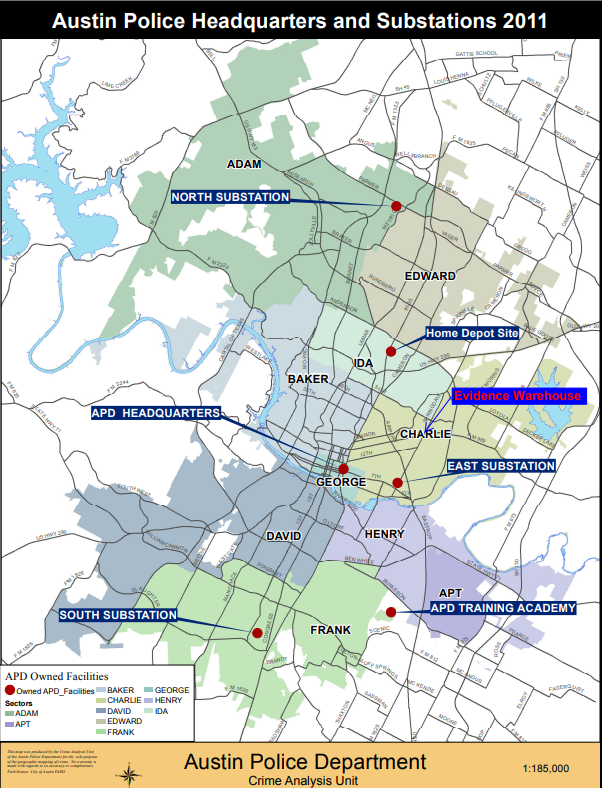

In [29]:
Image(filename='apd_sectors.png') 

### Aggregations on APD Sectors<a id='apd_sector_agg'>

In [264]:
sector_year=df_13_22_dist9.groupby(["year","sector"]).agg(
    count=('crime_type', 'count')
       
 ).reset_index().rename(
    columns={'year':'year','sector' : 'sector','count' : 'noc'})

sector_year.head(10)


year sector   noc
0  2013     BA  7170
1  2013     CH   723
2  2013     DA  1685
3  2013     GE  7785
4  2013     HE  1661
5  2013     ID   421
6  2013     UT    16
7  2014     BA  6735
8  2014     CH   678
9  2014     DA  1446

In [265]:
px.bar(sector_year, x = "year", y = "noc", color = "sector", title = "APD Sectors under council district(9)- NOC(2013-2022) ", text = "noc")

In [259]:
sector_year.head(20)

year sector   noc
0   2013     BA  7170
1   2013     CH   723
2   2013     DA  1685
3   2013     GE  7785
4   2013     HE  1661
5   2013     ID   421
6   2013     UT    16
7   2014     UT    24
8   2014     ID   285
9   2014     HE  1548
10  2014     CH   678
11  2014     DA  1446
12  2014     BA  6735
13  2014     GE  7245
14  2015     ID   225
15  2015     UT    22
16  2015     HE  1354
17  2015     CH   658
18  2015     DA  1302
19  2015     BA  7029

In [83]:
fig = px.line(sector_year, x = "year", y = "noc", color = "sector", labels =  {"noc" : "Number of Crime",
                                                                       "year" : "Year",
                                                                       "sector" : "APD Sector"}, title = "Crimes per Year under these APD sectors")

fig.update_layout(
    font_color="#5642C5",
    title_font_color="#5642C5",
    legend_title_font_color="#5642C5",
    font_size = 14
)

In [84]:

sector_hour = pd.DataFrame(data = (df_13_22_dist9.groupby(["hour","sector"]).count()[['crime_type']]).reset_index().values,
                        columns= ["hour","sector","noc"]).sort_values('hour').reset_index(drop=True)

fig = px.line(sector_hour, x = "hour", y = "noc", color = "sector", labels =  {"noc" : "Number of Crime",
                                                                       "hour" : "Hour",
                                                                       "sector" : "APD Sector"}, title = "Crimes per hour under these APD sectors")

fig.update_layout(
    font_color="#5642C5",
    title_font_color="#5642C5",
    legend_title_font_color="#5642C5",
    font_size = 14
)

### EDA on Census_tract<a id='census_tract'>

Census Tracts are small, relatively permanent statistical subdivisions of a county or statistically equivalent entity that can be updated by local participants prior to each decennial census as part of the Census Bureau's Participant Statistical Areas Program (PSAP)

In [99]:
df_13_22_dist9.census_tract.value_counts()

11       61914
3        23778
6        15049
2        11498
14        8949
12        8742
13.12     7755
4         5405
13.11     4472
23.23     3452
7         3066
5         2946
16        2004
23        1780
23.04      174
19.11       10
3.04         6
23.08        4
Name: census_tract, dtype: int64

#### Choosing censust tract 11 as it has highest number of crimes reported

In [90]:
df_13_22_dist9[df_13_22_dist9.census_tract == '11']

incident_report_number                      crime_type ucr_code  \
10364              20223651540                  EVADING / FOOT     2723   
10368                202310233  ASSAULT W/INJURY-FAM/DATE VIOL      900   
10370              20223651508         POSSESSION OF MARIJUANA     1803   
10396              20223651359    POSS CONTROLLED SUB/NARCOTIC     1800   
10427              20223651165                    DOC EXPOSURE     2411   
...                        ...                             ...      ...   
1048167            20135000111                           THEFT      600   
1048171              201310136             ASSAULT WITH INJURY      900   
1048194            20135000316                           THEFT      600   
1048206            20155030535                  IDENTITY THEFT     4022   
1048219            20135000041                           THEFT      600   

        family_violence                            location_type  \
10364                 N     HWY / ROAD / ALLEY/ STREET/ SIDEWALK   
10368                 Y                     HOTEL / MOTEL / ETC.   
10370                 N     HWY / ROAD / ALLEY/ STREET/ SIDEWALK   
10396                 N     HWY / ROAD / ALLEY/ STREET/ SIDEWALK   
10427                 N  DRUG STORE / DOCTOR'S OFFICE / HOSPITAL   
...                 ...                                      ...   
1048167               N                         RESIDENCE / HOME   
1048171               N     HWY / ROAD / ALLEY/ STREET/ SIDEWALK   
1048194               N                          BAR / NIGHTCLUB   
1048206               N                          OTHER / UNKNOWN   
1048219               N                          BAR / NIGHTCLUB   

                      address zip_code council_district sector district  ...  \
10364    NECHES ST / E 7TH ST    78701                9     GE        2  ...   
10368            310 E 5TH ST    78701                9     GE        2  ...   
10370            408 E 6TH ST    78701                9     GE        2  ...   
10396      400 BLOCK E 6TH ST    78701                9     GE        2  ...   
10427        500 CONGRESS AVE    78701                9     GE        1  ...   
...                       ...      ...              ...    ...      ...  ...   
1048167          92 RAINEY ST    78701                9     GE        3  ...   
1048171          314 E 6TH ST    78701                9     GE        2  ...   
1048194          314 E 6TH ST    78701                9     GE        2  ...   
1048206          715 E 8TH ST    78701                9     GE        2  ...   
1048219          401 E 6TH ST    78701                9     GE        2  ...   

            longitude                                           location  \
10364    -97.73792112  {'human_address': '{"address": "", "city": "",...   
10368    -97.74022892  {'human_address': '{"address": "", "city": "",...   
10370    -97.73879424  {'human_address': '{"address": "", "city": "",...   
10396    -97.73909331  {'human_address': '{"address": "", "city": "",...   
10427    -97.74354926  {'human_address': '{"address": "", "city": "",...   
...               ...                                                ...   
1048167  -97.73843366  {'human_address': '{"address": "", "city": "",...   
1048171  -97.73971914  {'human_address': '{"address": "", "city": "",...   
1048194  -97.73971914  {'human_address': '{"address": "", "city": "",...   
1048206  -97.73467415  {'human_address': '{"address": "", "city": "",...   
1048219  -97.73926936  {'human_address': '{"address": "", "city": "",...   

        clearance_status           clearance_date  occurred_date_time  \
10364                  C  2023-01-01T00:00:00.000 2022-12-31 23:49:00   
10368                  N  2023-01-13T00:00:00.000 2022-12-31 23:30:00   
10370               None                     None 2022-12-31 23:26:00   
10396                  C  2023-01-01T00:00:00.000 2022-12-31 21:45:00   
10427                  C  2022-12-31T00:00:00.000 2

### Council District 9  ---> Census Tract 11

In [91]:
df_11_census= df_13_22_dist9[df_13_22_dist9.census_tract == '11']

In [92]:
df_11_census.shape

(61914, 25)

In [95]:
df_11_census.sector.value_counts()

GE    60500
CH     1414
Name: sector, dtype: int64

In [94]:
df_11_census.zip_code.value_counts()

78701    61575
78703      339
Name: zip_code, dtype: int64

##### To visualize census tract which is under council district 9, I made use ot Tableau and took the screen shot and circled the area to highlight  the area for better depiction

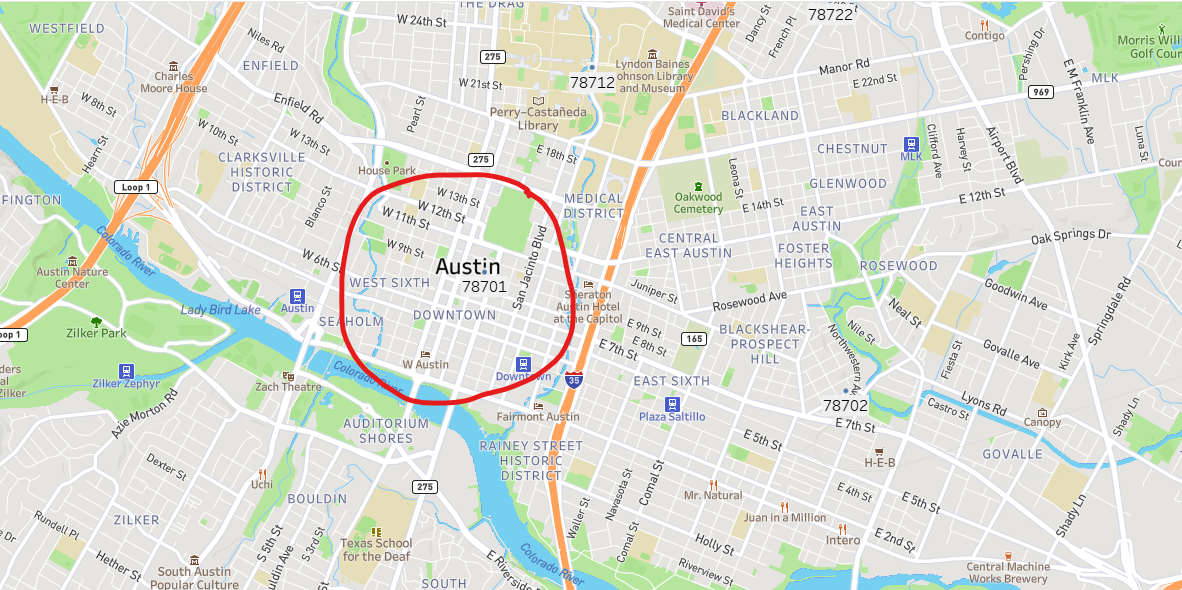

In [96]:
Image(filename='78701_zip.png') 

### Council District 9 ---> Census Tract 11 ----> Zip_code 78701

In [97]:
df_78701= df_11_census[df_11_census.zip_code == '78701']

In [98]:
df_78701.shape

(61575, 25)

### EDA on zip_codes <a id='zip_codes'>

### Crime Count Visualization(yearly,monthly,daily, hourly)<a id='daily_crime'>

In [118]:
crime_cnt_year = pd.DataFrame(data = df_78701["year"].value_counts().reset_index().values,
                        columns = ["year", "crime_cnt"]).sort_values("year").reset_index(drop = True)

In [119]:
crime_cnt_year.head(10)

year crime_cnt
0  2013      7722
1  2014      7033
2  2015      6822
3  2016      6465
4  2017      6799
5  2018      5850
6  2019      6729
7  2020      4559
8  2021      4780
9  2022      4816

In [122]:
crime_cnt_month = pd.DataFrame(data = df_78701["month"].value_counts().reset_index().values,
                        columns = ["month", "crime_cnt"]).sort_values("month").reset_index(drop = True)

In [123]:
crime_cnt_month.head(12)

month crime_cnt
0       April      4949
1      August      5084
2    December      4568
3    February      4769
4     January      4869
5        July      5286
6        June      5214
7       March      6321
8         May      5348
9    November      4803
10    October      5273
11  September      5091

In [127]:
crime_cnt_day = pd.DataFrame(data = df_78701["day"].value_counts().reset_index().values,
                        columns = ["day", "crime_cnt"]).sort_values("day").reset_index(drop = True)

In [129]:
crime_cnt_day.head(7)

day crime_cnt
0     Friday     10017
1     Monday      7710
2   Saturday     10689
3     Sunday     10444
4   Thursday      7954
5    Tuesday      7264
6  Wednesday      7497

#### Crime rates are high during weekends for this area. Thsi area is a donwtown area and very active and busy. 

In [128]:
crime_cnt_hour = pd.DataFrame(data = df_78701["hour"].value_counts().reset_index().values,
                        columns = ["hour", "crime_cnt"]).sort_values("hour").reset_index(drop = True)

In [130]:
crime_cnt_hour.head(3)

hour  crime_cnt
0     0       5037
1     1       5680
2     2       6260

In [131]:
fig = make_subplots(rows=2,cols=2, specs = [[{"type" : "scatter"}, {"type" : "scatter"}], [{"type" : "scatter"},
                             {"type" : "scatter"}]],
                   subplot_titles = ("# Crimes per Year", "# Crimes per Month", "# Crimes per Day", "# Crimes per Hour"))

In [132]:

fig.add_trace(
    go.Scatter(x=crime_cnt_year.year, y=crime_cnt_year.crime_cnt), row = 1, col = 1)
fig.add_trace(
    go.Scatter(x=crime_cnt_month.month, y=crime_cnt_month.crime_cnt), row = 1, col = 2)
fig.add_trace(
    go.Scatter(x=crime_cnt_day.day, y=crime_cnt_day.crime_cnt), row = 2, col = 1)
fig.add_trace(
    go.Scatter(x=crime_cnt_hour.hour, y=crime_cnt_hour.crime_cnt), row = 2, col = 2)

# Update x axes parameters
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Month", range=[0, 13], row=1, col=2)
fig.update_xaxes(title_text="Day", row=2, col=1)
fig.update_xaxes(title_text="Hour",row=2, col=2)

# Update y axes parameters
fig.update_yaxes(title_text="# of Crimes", row=1, col=1)
fig.update_yaxes(title_text="# of Crimes",row=1, col=2)
fig.update_yaxes(title_text="# of Crimes", row=2, col=1)
fig.update_yaxes(title_text="# of Crimes", row=2, col=2)

fig.update_layout(showlegend=False,title_text="Distributions of Total Crimes Between 2018-2022", height=900)

#### EDA on Clearance Status<a id='clearance_status'>

In [133]:
df_78701['clearance_status'].value_counts()

N    32509
C    21565
O      686
Name: clearance_status, dtype: int64

In [134]:
df_78701["family_violence"].value_counts()

N    60186
Y     1389
Name: family_violence, dtype: int64

In [136]:
crime_family_violence = pd.DataFrame(data = df_78701["family_violence"].value_counts().reset_index().values,
                        columns = ["family_violence", "crime_cnt"]).sort_values("family_violence").reset_index(drop = True)

In [137]:
crime_family_violence.head()

family_violence crime_cnt
0               N     60186
1               Y      1389

In [139]:
df_78701.head()

incident_report_number                      crime_type ucr_code  \
10364            20223651540                  EVADING / FOOT     2723   
10368              202310233  ASSAULT W/INJURY-FAM/DATE VIOL      900   
10370            20223651508         POSSESSION OF MARIJUANA     1803   
10396            20223651359    POSS CONTROLLED SUB/NARCOTIC     1800   
10427            20223651165                    DOC EXPOSURE     2411   

      family_violence                            location_type  \
10364               N     HWY / ROAD / ALLEY/ STREET/ SIDEWALK   
10368               Y                     HOTEL / MOTEL / ETC.   
10370               N     HWY / ROAD / ALLEY/ STREET/ SIDEWALK   
10396               N     HWY / ROAD / ALLEY/ STREET/ SIDEWALK   
10427               N  DRUG STORE / DOCTOR'S OFFICE / HOSPITAL   

                    address zip_code council_district sector district  ...  \
10364  NECHES ST / E 7TH ST    78701                9     GE        2  ...   
10368          310 E 5TH ST    78701                9     GE        2  ...   
10370          408 E 6TH ST    78701                9     GE        2  ...   
10396    400 BLOCK E 6TH ST    78701                9     GE        2  ...   
10427      500 CONGRESS AVE    78701                9     GE        1  ...   

          longitude                                           location  \
10364  -97.73792112  {'human_address': '{"address": "", "city": "",...   
10368  -97.74022892  {'human_address': '{"address": "", "city": "",...   
10370  -97.73879424  {'human_address': '{"address": "", "city": "",...   
10396  -97.73909331  {'human_address': '{"address": "", "city": "",...   
10427  -97.74354926  {'human_address': '{"address": "", "city": "",...   

      clearance_status           clearance_date  occurred_date_time  \
10364                C  2023-01-01T00:00:00.000 2022-12-31 23:49:00   
10368                N  2023-01-13T00:00:00.000 2022-12-31 23:30:00   
10370             None                     None 2022-12-31 23:26:00   
10396                C  2023-01-01T00:00:00.000 2022-12-31 21:45:00   
10427                C  2022-12-31T00:00:00.000 2022-12-31 19:29:00   

       reported_date_time     month  year hour       day  
10364 2022-12-31 23:49:00  December  2022   23  Saturday  
10368 2023-01-01 06:15:00  December  2022   23  Saturday  
10370 2022-12-31 23:26:00  December  2022   23  Saturday  
10396 2022-12-31 21:45:00  December  2022   21  Saturday  
10427 2022-12-31 19:29:00  December  2022   19  Saturday  

[5 rows x 25 columns]

### TOP TEN CRIMES which occur in the area of 78701

In [145]:
df_78701['crime_type'].value_counts().head(10)

THEFT                          7439
ASSAULT WITH INJURY            4260
WARRANT ARREST NON TRAFFIC     3545
BURGLARY OF VEHICLE            2963
DWI                            2751
CRIMINAL MISCHIEF              2444
POSS OF DRUG PARAPHERNALIA     2300
DISTURBANCE - OTHER            1896
VIOL CITY ORDINANCE - OTHER    1563
ASSAULT BY CONTACT             1519
Name: crime_type, dtype: int64

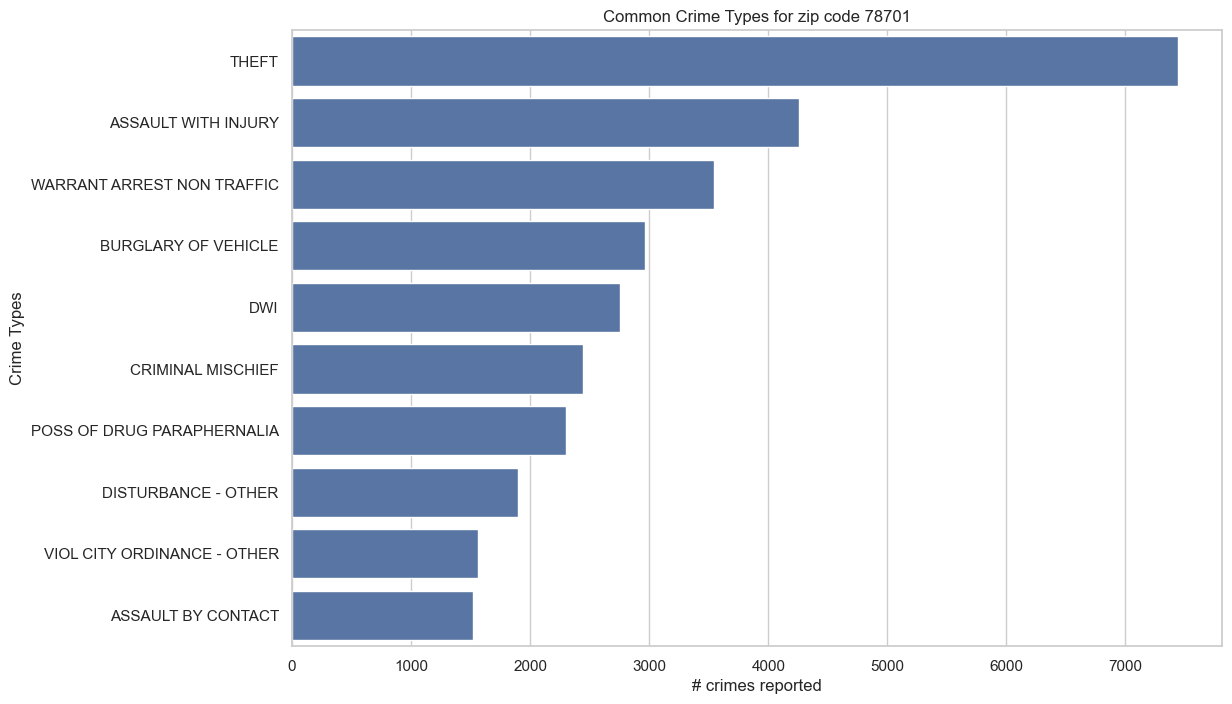

In [144]:
common_crime_type = df_78701['crime_type'].value_counts().head(10)
sns.set(rc={'figure.figsize':(12,8)},style="whitegrid")
g = sns.barplot(y=common_crime_type.index, x=common_crime_type.values,color='b')
g.set(xlabel='# crimes reported', ylabel='Crime Types')
plt.title('Common Crime Types for zip code 78701')
plt.show()

##### I will take the top ten crimes from this zip_code 78701 data and will store this a list. Later I would like to analyze the occurance of these top ten crimes per month

In [215]:
top_ten_crimes = df_78701['crime_type'].value_counts(dropna=False).head(10).keys().tolist()

In [216]:
top_ten_crimes


['THEFT',
 'ASSAULT WITH INJURY',
 'WARRANT ARREST NON TRAFFIC',
 'BURGLARY OF VEHICLE',
 'DWI',
 'CRIMINAL MISCHIEF',
 'POSS OF DRUG PARAPHERNALIA',
 'DISTURBANCE - OTHER',
 'VIOL CITY ORDINANCE - OTHER',
 'ASSAULT BY CONTACT']

In [151]:
df_78701['year_month'] = pd.to_datetime(df_78701['occurred_date_time']).dt.strftime('%Y-%m')

In [192]:
df_78701['occurred_day'] = df_78701['occurred_date_time'].apply(lambda x: x.strftime('%d')) 

I am dropping this 'day' column as I wanted the day format to be in numbers from 01-30, 31 

In [195]:
df_78701.drop('day',axis=1,inplace=True)

In [196]:
df_78701.tail()

incident_report_number           crime_type ucr_code family_violence  \
1048167            20135000111                THEFT      600               N   
1048171              201310136  ASSAULT WITH INJURY      900               N   
1048194            20135000316                THEFT      600               N   
1048206            20155030535       IDENTITY THEFT     4022               N   
1048219            20135000041                THEFT      600               N   

                                location_type       address zip_code  \
1048167                      RESIDENCE / HOME  92 RAINEY ST    78701   
1048171  HWY / ROAD / ALLEY/ STREET/ SIDEWALK  314 E 6TH ST    78701   
1048194                       BAR / NIGHTCLUB  314 E 6TH ST    78701   
1048206                       OTHER / UNKNOWN  715 E 8TH ST    78701   
1048219                       BAR / NIGHTCLUB  401 E 6TH ST    78701   

        council_district sector district  ...  \
1048167                9     GE        3  ...   
1048171                9     GE        2  ...   
1048194                9     GE        2  ...   
1048206                9     GE        2  ...   
1048219                9     GE        2  ...   

                                                  location clearance_status  \
1048167  {'human_address': '{"address": "", "city": "",...                N   
1048171  {'human_address': '{"address": "", "city": "",...             None   
1048194  {'human_address': '{"address": "", "city": "",...                N   
1048206  {'human_address': '{"address": "", "city": "",...                N   
1048219  {'human_address': '{"address": "", "city": "",...                N   

                  clearance_date  occurred_date_time  reported_date_time  \
1048167  2013-01-03T00:00:00.000 2013-01-01 00:30:00 2013-01-02 00:05:00   
1048171                     None 2013-01-01 00:23:00 2013-01-01 00:23:00   
1048194  2013-01-23T00:00:00.000 2013-01-01 00:00:00 2013-01-02 22:58:00   
1048206  2015-07-14T00:00:00.000 2013-01-01 00:00:00 2015-07-13 20:32:00   
1048219  2013-01-02T00:00:00.000 2013-01-01 00:00:00 2013-01-01 12:11:00   

           month  year hour year_month occurred_day  
1048167  January  2013    0    2013-01           01  
1048171  January  2013    0    2013-01           01  
1048194  January  2013    0    2013-01           01  
1048206  January  2013    0    2013-01           01  
1048219  January  2013    0    2013-01           01  

[5 rows x 26 columns]

### Group Aggregation based on year_month, day and crime_type for top ten crimes<a id='top_10_gp_agg'>

Here, I am getting the data where the crimes are in the top_ten_crime list which we had populated a few cells above. 

In [288]:
df_78701_top_ten_crimes=df_78701[df_78701['crime_type'].isin(top_ten_crimes)].groupby(['year_month','crime_type']).agg(
                    count=('crime_type', 'count')).reset_index()

In [289]:
df_78701_top_ten_crimes.shape

(1170, 3)

In [290]:
df_78701_top_ten_crimes.head()

year_month           crime_type  count
0    2013-01   ASSAULT BY CONTACT      7
1    2013-01  ASSAULT WITH INJURY     39
2    2013-01  BURGLARY OF VEHICLE     21
3    2013-01    CRIMINAL MISCHIEF     23
4    2013-01  DISTURBANCE - OTHER      6

#### To visualize the data for these top ten crime instances, I am choosing one year (2022) data. 

### Crime Types in 2022 year<a id='crime_types_2022'>

In [280]:
monthly_top_ten_crimes = df_78701_top_ten_crimes[df_78701_top_ten_crimes['year_month'] > '2021-12'].groupby(['year_month','crime_type']).agg(
                count=('crime_type', 'count')).reset_index()

In [281]:
monthly_top_ten_crimes.shape

(109, 3)

In [282]:
monthly_top_ten_crimes.head(10)

year_month                  crime_type  count
0    2022-01          ASSAULT BY CONTACT     11
1    2022-01         ASSAULT WITH INJURY     17
2    2022-01         BURGLARY OF VEHICLE     20
3    2022-01           CRIMINAL MISCHIEF     11
4    2022-01         DISTURBANCE - OTHER     12
5    2022-01                         DWI      7
6    2022-01  POSS OF DRUG PARAPHERNALIA      4
7    2022-01                       THEFT     21
8    2022-02          ASSAULT BY CONTACT      9
9    2022-02         ASSAULT WITH INJURY     11

In [283]:
fig = px.line(monthly_top_ten_crimes, x = "year_month", y = "count", color = "crime_type", labels =  {"count" : "Number of Crime",
                                                                       "year_month" : "Year-Month",
                                                                       "crime_type" : "Crime Type"}, title = "Crimes per month for 78701 zip code in 2022")

fig.update_layout(
    font_color="#5642C5",
    title_font_color="#5642C5",
    legend_title_font_color="#5642C5",
    font_size = 14
)

In [284]:
#saving this file
table1 = pa.Table.from_pandas(monthly_top_ten_crimes, preserve_index=True)
pq.write_table(table1, 'monthly_top_ten_crimes.parquet')

In [285]:
#saving this file
table2 = pa.Table.from_pandas(df_78701, preserve_index=True)
pq.write_table(table2, 'df_78701.parquet')

### Preparing the dataset for TIme series analysis using pivot_table method<a id='pivot_table'>

In [299]:
output = pd.pivot_table(data=df_78701_top_ten_crimes, 
                        index=['year_month'], 
                        columns=['crime_type'], 
                        values='count',
                        aggfunc='sum').reset_index().rename_axis(None, axis=1)
output

year_month  ASSAULT BY CONTACT  ASSAULT WITH INJURY  BURGLARY OF VEHICLE  \
0      2013-01                 7.0                 39.0                 21.0   
1      2013-02                 9.0                 26.0                 19.0   
2      2013-03                13.0                 71.0                 20.0   
3      2013-04                 8.0                 47.0                 14.0   
4      2013-05                10.0                 48.0                 41.0   
..         ...                 ...                  ...                  ...   
115    2022-08                14.0                 37.0                 26.0   
116    2022-09                 9.0                 26.0                 24.0   
117    2022-10                13.0                 34.0                 32.0   
118    2022-11                16.0                 30.0                 24.0   
119    2022-12                11.0                 25.0                 14.0   

     CRIMINAL MISCHIEF  DISTURBANCE - OTHER   DWI  POSS OF DRUG PARAPHERNALIA  \
0                 23.0                  6.0  36.0                         5.0   
1                 22.0                  9.0  31.0                         7.0   
2                 31.0                 17.0  46.0                         6.0   
3                 20.0                 11.0  31.0                        16.0   
4                 20.0                 23.0  26.0                        11.0   
..                 ...                  ...   ...                         ...   
115               20.0                  6.0   8.0                         6.0   
116               17.0                  7.0   7.0                         7.0   
117               17.0                 10.0   2.0                        17.0   
118               20.0                  7.0  12.0                        10.0   
119               14.0                  5.0   6.0                         6.0   

     THEFT  VIOL CITY ORDINANCE - OTHER  WARRANT ARREST NON TRAFFIC  
0     93.0                         18.0                        40.0  
1     88.0                         23.0                        52.0  
2    176.0                         21.0                        59.0  
3     74.0                         52.0                        67.0  
4     96.0                         99.0                        58.0  
..     ...                          ...                         ...  
115   35.0                          1.0                         NaN  
116   56.0                          2.0                         NaN  
117   37.0                          1.0                         NaN  
118   32.0                          2.0                         NaN  
119   32.0                          NaN                         NaN  

[120 rows x 11 columns]

In [300]:
output.shape

(120, 11)

In [303]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year_month                   120 non-null    object 
 1   ASSAULT BY CONTACT           120 non-null    float64
 2   ASSAULT WITH INJURY          120 non-null    float64
 3   BURGLARY OF VEHICLE          120 non-null    float64
 4   CRIMINAL MISCHIEF            120 non-null    float64
 5   DISTURBANCE - OTHER          120 non-null    float64
 6   DWI                          119 non-null    float64
 7   POSS OF DRUG PARAPHERNALIA   120 non-null    float64
 8   THEFT                        120 non-null    float64
 9   VIOL CITY ORDINANCE - OTHER  110 non-null    float64
 10  WARRANT ARREST NON TRAFFIC   101 non-null    float64
dtypes: float64(10), object(1)
memory usage: 10.4+ KB


### Missing Values<a id='missing_values'>

In [304]:
missing = pd.concat([output.isnull().sum(), 100 * output.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values('count', ascending=False)

count          %
WARRANT ARREST NON TRAFFIC      19  15.833333
VIOL CITY ORDINANCE - OTHER     10   8.333333
DWI                              1   0.833333
year_month                       0   0.000000
ASSAULT BY CONTACT               0   0.000000
ASSAULT WITH INJURY              0   0.000000
BURGLARY OF VEHICLE              0   0.000000
CRIMINAL MISCHIEF                0   0.000000
DISTURBANCE - OTHER              0   0.000000
POSS OF DRUG PARAPHERNALIA       0   0.000000
THEFT                            0   0.000000

### Filling the missing values<a id='fillna_method'>

In [305]:
output['WARRANT ARREST NON TRAFFIC'].fillna(output['WARRANT ARREST NON TRAFFIC'].median(), inplace = True)

In [306]:
output['VIOL CITY ORDINANCE - OTHER'].fillna(output['VIOL CITY ORDINANCE - OTHER'].median(), inplace = True)
output['DWI'].fillna(output['DWI'].median(), inplace = True)

In [307]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year_month                   120 non-null    object 
 1   ASSAULT BY CONTACT           120 non-null    float64
 2   ASSAULT WITH INJURY          120 non-null    float64
 3   BURGLARY OF VEHICLE          120 non-null    float64
 4   CRIMINAL MISCHIEF            120 non-null    float64
 5   DISTURBANCE - OTHER          120 non-null    float64
 6   DWI                          120 non-null    float64
 7   POSS OF DRUG PARAPHERNALIA   120 non-null    float64
 8   THEFT                        120 non-null    float64
 9   VIOL CITY ORDINANCE - OTHER  120 non-null    float64
 10  WARRANT ARREST NON TRAFFIC   120 non-null    float64
dtypes: float64(10), object(1)
memory usage: 10.4+ KB


In [308]:
output.describe()

ASSAULT BY CONTACT  ASSAULT WITH INJURY  BURGLARY OF VEHICLE  \
count          120.000000           120.000000           120.000000   
mean            12.658333            35.500000            24.691667   
std              3.872974             9.768755            10.868036   
min              4.000000            12.000000             9.000000   
25%             10.000000            29.000000            17.000000   
50%             12.000000            35.000000            22.500000   
75%             15.250000            42.000000            31.000000   
max             22.000000            71.000000            57.000000   

       CRIMINAL MISCHIEF  DISTURBANCE - OTHER         DWI  \
count         120.000000           120.000000  120.000000   
mean           20.366667            15.800000   23.125000   
std             5.578972             6.041314   11.422786   
min             7.000000             4.000000    2.000000   
25%            17.000000            12.000000   13.750000   
50%            20.000000            16.000000   24.000000   
75%            24.000000            20.000000   31.000000   
max            39.000000            29.000000   46.000000   

       POSS OF DRUG PARAPHERNALIA       THEFT  VIOL CITY ORDINANCE - OTHER  \
count                  120.000000  120.000000                   120.000000   
mean                    19.166667   61.991667                    13.441667   
std                     25.100917   24.075335                    19.347680   
min                      1.000000   17.000000                     1.000000   
25%                      8.000000   44.500000                     2.000000   
50%                     13.000000   62.000000                     5.000000   
75%                     19.000000   75.000000                    14.000000   
max                    164.000000  176.000000                    99.000000   

       WARRANT ARREST NON TRAFFIC  
count                  120.000000  
mean                    34.925000  
std                     25.497458  
min                      1.000000  
25%                     12.750000  
50%                     34.000000  
75%                     51.000000  
max                    105.000000

#### All Nan's are taken care of!

### Out of these ten features, visualizing five features which have high crime rate

In [313]:
fig = px.line(output, x='year_month', y='THEFT', title="Theft",template='plotly_dark')

fig.show()

In [309]:
fig = px.line(output, x='year_month', y='ASSAULT WITH INJURY', title="ASSAULT WITH INJURY",template='plotly_dark')

fig.show()

In [310]:
fig = px.line(output, x='year_month', y='WARRANT ARREST NON TRAFFIC', title="WARRANT ARREST NON TRAFFIC",template='plotly_dark')

fig.show()

In [311]:
fig = px.line(output, x='year_month', y='BURGLARY OF VEHICLE', title="BURGLARY OF VEHICLE",template='plotly_dark')

fig.show()

In [312]:
fig = px.line(output, x='year_month', y='DWI', title="Driving While Intoxicated",template='plotly_dark')

fig.show()

### Summary of EDA<a id='summary'>

Explored data by applying heiarchial method. Chose Council District with high crime cases. From that data, I chose Austin Census Tract under that which has high crime cases followed by the zip code whichis 78701 .

<br/>78701 is a downtown area where we see high crimes
<br/>Applied Tableau and plotly for visualizations
<br/>I am using top ten crimes as the dataset's  features and using year_month as the Time factor. 
<br />Looks like Assault with injury and Burglary of vehicle is on the rise. 
